# Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import find_peaks
from sympy import symbols, exp, inverse_laplace_transform

# Dados

In [2]:
data = loadmat('/content/drive/MyDrive/sinais/assets/Equipe_10.mat')
matriz_dados = data['z1']
y = matriz_dados[:,0]
u = matriz_dados[0,1]
k = (y[-1] - y[0]) / u
print(f'K = {k}')
y = (y - min(y)) / (max(y) - min(y)) # Normalizando dados
n = len(y)
x = np.linspace(0,1000,n)

K = 5.1025913073133395


# Atividade 1
Obter o gráfico da temperatura x tempo conforme exemplo ilustrado.

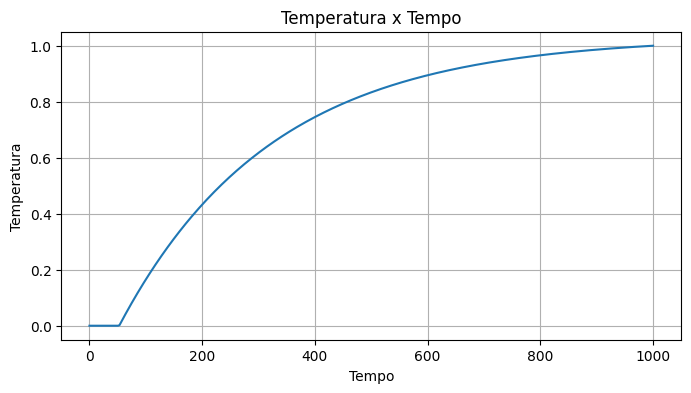

In [3]:
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.title('Temperatura x Tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.grid()
plt.show()

# Atividade 2

Desenvolver um código para gerar a reta tangente no ponto de inflexão. Em seguida, determinar os parâmetros (ganho, atraso e constante de tempo) do modelo do processo.

In [4]:
dy = np.gradient(y,x)

inflection_point = np.argmax(dy)
inflexy = y[inflection_point]
slope = dy[inflection_point]
n=inflexy-(slope*x[inflection_point])
tangent_line = slope * x + n

In [5]:
x[inflection_point]

56.0

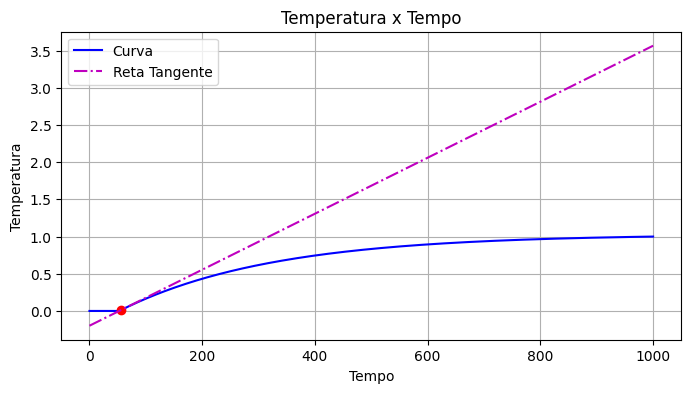

In [6]:
plt.figure(figsize=(8,4))
plt.plot(x, y, "-b", label='Curva')
plt.plot(x[inflection_point], y[inflection_point], 'ro')
plt.plot(x, tangent_line, "-.m", label='Reta Tangente')
plt.title("Temperatura x Tempo")
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.legend()
plt.grid()
plt.show()

In [7]:
atraso = np.where(dy != 0)[0][0]
x_atraso = x[atraso]
x_max_tau = (y[-1] - n) / slope
constempo = x_max_tau - x_atraso
print(f"Atraso: {atraso}")
print(f"X[atraso]: {x[atraso]}")
print(f"Constante de Tempo: {constempo}")

Atraso: 19
X[atraso]: 50.666666666666664
Constante de Tempo: 267.71916066416475


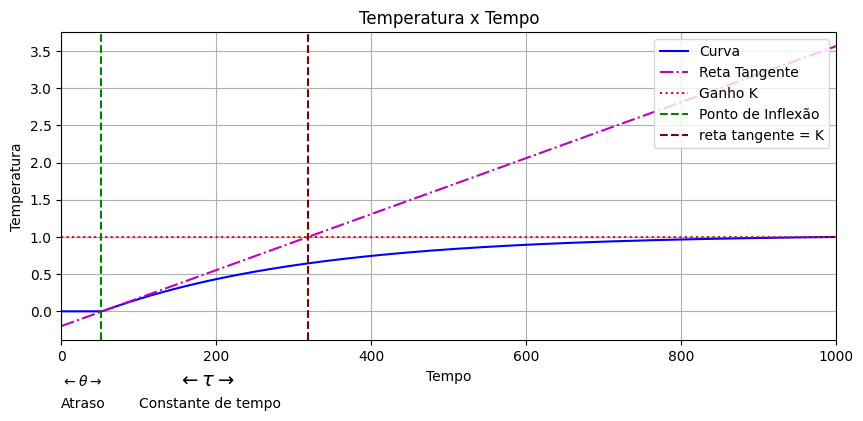

In [8]:
plt.figure(figsize=(10,4))
plt.plot(x, y, "-b", label='Curva')
plt.plot(x, tangent_line, "-.m", label='Reta Tangente')
plt.axhline(y = y[-1], color = 'r', linestyle = ':', label='Ganho K')
plt.axvline(x = x_atraso, color ='g', linestyle='--', label ='Ponto de Inflexão')
plt.axvline(x = x_max_tau, color ='maroon', linestyle='--', label ='reta tangente = K')
plt.title("Temperatura x Tempo")
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.text(-1,-1, r"$\leftarrow \theta \rightarrow$", fontsize=10)
plt.text(150,-1, r"$\leftarrow \tau \rightarrow$", fontsize=14)
plt.text(-1,-1.3, "Atraso", fontsize=10)
plt.text(100,-1.3, "Constante de tempo", fontsize=10)
plt.legend(loc=1)
plt.grid()
plt.xlim([0,1000])
plt.show()

# Atividade 3

Para o ensaio de malha aberta foi aplicado um degrau _u(t)_ de amplitude 10. Para validação do modelo, determinar o MSE (Mean Squared Error).

In [9]:
s, t = symbols('s t')
G = y[-1] * exp(-x[atraso] * s) / (constempo * s + 1)
U = 1 / s
H = G * U

h = inverse_laplace_transform(H, s, t)

h_t = np.array([h.subs(t, t_val) for t_val in x])
mse = np.mean((h_t - y)**2)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.000393939959858205


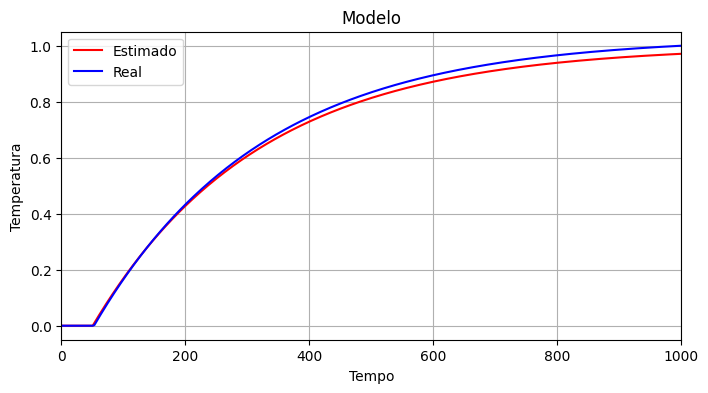

In [10]:
plt.figure(figsize=(8,4))
plt.plot(x, h_t, c='r', label='Estimado')
plt.plot(x, y, c='b', label='Real')
plt.title('Modelo')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.grid()
plt.xlim([0,1000])
plt.show()